In [1]:
import pandas as pd

df=pd.read_csv('C:\dataset\HRData\EDA_Dataset.csv')

In [88]:
h=df.loc[df['MonthlyIncome']<10000].index
h

Int64Index([], dtype='int64')

In [87]:
l=df.loc[df['MonthlyIncome']>60000].index
l

Int64Index([], dtype='int64')

In [86]:
df.drop(index=l,axis=0,inplace=True)

In [85]:
df.drop(index=h,axis=0,inplace=True)

<Axes: xlabel='MonthlyIncome', ylabel='WorkExperience'>

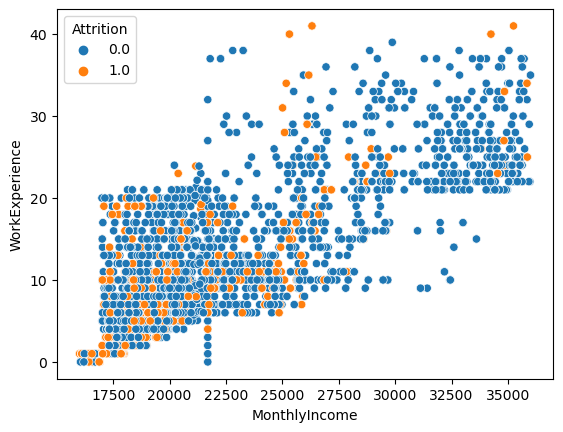

In [89]:
sns.scatterplot(x='MonthlyIncome',y='WorkExperience',data=df,hue='Attrition')

In [90]:
df_corr=df.corr()

In [91]:
df_corr['Attrition'].sort_values(ascending=False)

Attrition                           1.000000
OverTime                            0.281608
Designation_Executive               0.239988
MaritalStatus_Single                0.219216
Involvement                         0.144430
JobSatisfaction                     0.126931
TravelProfile_Yes                   0.123858
EducationField_Engineer             0.090613
HomeToWork                          0.086107
Department_Sales                    0.078358
EducationField_Marketing Diploma    0.070770
NumCompaniesWorked                  0.050120
EducationField_MBA                  0.035779
Gender_M                            0.035622
HourlnWeek                          0.020851
WorkLifeBalance                     0.013354
ESOPs                               0.012208
Department_Marketing                0.010728
SalaryHikelastYear                 -0.006687
Unnamed: 0                         -0.022983
EmployeeID                         -0.022983
Designation_Senior Manager         -0.032708
LastPromot

In [92]:
df_corr_fnl=df[['Attrition','OverTime','Designation_Executive','MaritalStatus_Single','WorkExperience','MonthlyIncome']]

In [93]:
df_corr_fnl

,Attrition,OverTime,Designation_Executive,MaritalStatus_Single,WorkExperience,MonthlyIncome
0,0.0,1.0,1,0,7.0,18932.0
1,1.0,0.0,1,1,4.0,18785.0
2,0.0,0.0,0,1,12.0,22091.0
3,0.0,0.0,0,0,5.0,20302.0
4,0.0,0.0,0,0,12.0,21674.0
...,...,...,...,...,...,...
5175,0.0,1.0,0,1,11.0,22142.0
5176,0.0,0.0,1,1,8.0,17109.0
5177,0.0,0.0,1,0,8.0,17532.0
5178,0.0,0.0,1,0,8.0,17942.0


In [94]:
import matplotlib.pyplot as plt
import seaborn as sns


<Axes: xlabel='MonthlyIncome', ylabel='WorkExperience'>

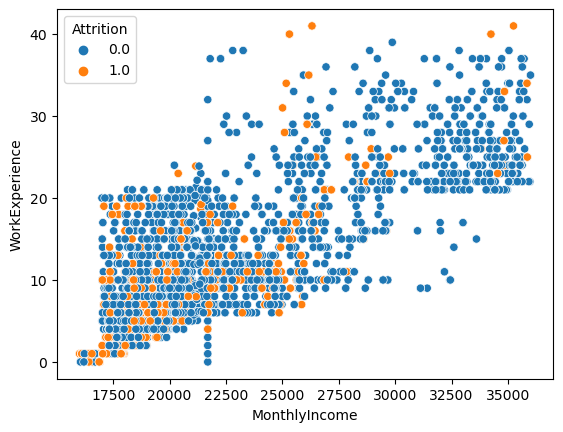

In [95]:
sns.scatterplot(x='MonthlyIncome',y='WorkExperience',data=df_corr_fnl,hue='Attrition')

In [96]:
from sklearn.model_selection import train_test_split,cross_val_score,cross_validate
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score,f1_score,recall_score,confusion_matrix,accuracy_score
from sklearn.preprocessing import StandardScaler

In [97]:
X=df_corr_fnl[['OverTime','Designation_Executive','MaritalStatus_Single']]
y=df_corr_fnl['Attrition']

In [98]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [99]:
model=LogisticRegression()

In [100]:
model.fit(X_train,y_train)

LogisticRegression()

In [101]:
y_model_pred=model.predict(X_test)

In [102]:
accuracy_score(y_test,y_model_pred)

0.7895752895752896

In [103]:
precision_score(y_test,y_model_pred)

0.6224489795918368

In [104]:
recall_score(y_test,y_model_pred)

0.45864661654135336

In [105]:
f1_score(y_test,y_model_pred)

0.5281385281385281

In [106]:
confusion_matrix(y_test,y_model_pred)

array([[696,  74],
       [144, 122]], dtype=int64)

In [107]:
scoring = ['precision_macro', 'recall_macro','f1_macro']
#score=cross_validate(lgst, X_train, y_train, cv=15,scoring=scoring)
scores = cross_val_score(model, X_train, y_train, cv=4,scoring='f1')
scores

array([0.50497018, 0.5060241 , 0.49166667, 0.51546392])

In [28]:
from sklearn.dummy import DummyClassifier
dmy=DummyClassifier(strategy='most_frequent')
dmy.fit(X_train,y_train)

DummyClassifier(strategy='most_frequent')

In [29]:
y_pred_dum=dmy.predict(X_test)

In [30]:
accuracy_score(y_test,y_pred_dum)

0.724903474903475

In [31]:
f1_score(y_test,y_pred_dum)

0.0

In [32]:
confusion_matrix(y_test,y_pred_dum)

array([[751,   0],
       [285,   0]], dtype=int64)